In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [2]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Check shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

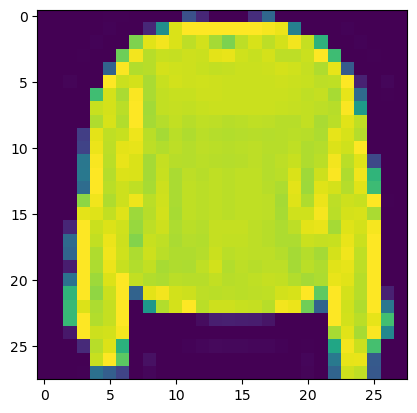

In [5]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [6]:
# Check our samples label
train_labels[7]

2

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?

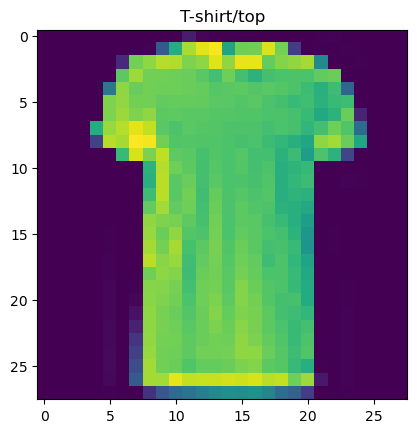

In [11]:
# Plot an example image and its label
plt.imshow(train_data[17]) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

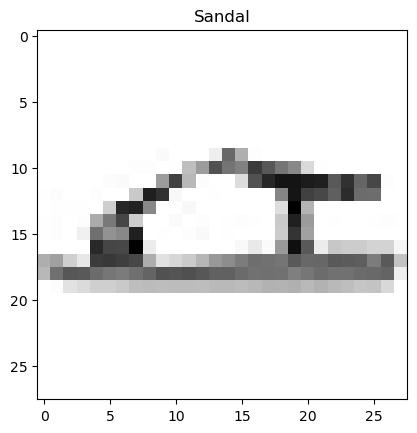

In [12]:
# Plot an example image and its label
plt.imshow(train_data[120], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[120]]);

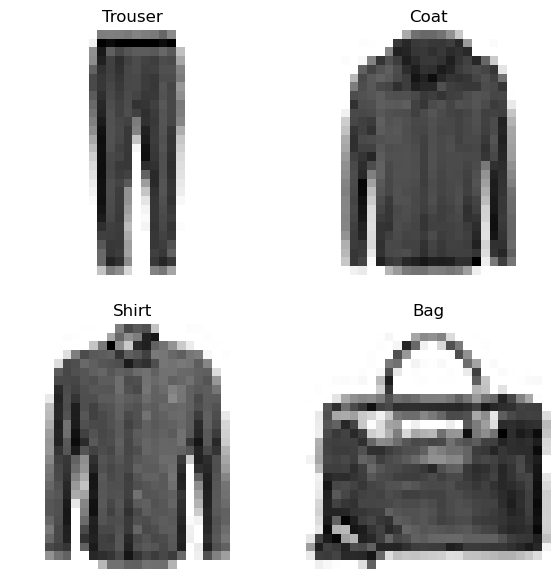

In [13]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Build a multiclassification model

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.2105 - accuracy: 0.1388 - val_loss: 1.9081 - val_accuracy: 0.2304
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8022 - accuracy: 0.2247 - val_loss: 1.7431 - val_accuracy: 0.2590
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7231 - accuracy: 0.2496 - val_loss: 1.6951 - val_accuracy: 0.2588
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6858 - accuracy: 0.2644 - val_loss: 1.6687 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.6702 - accuracy: 0.2747 - val_loss: 1.6639 - val_accuracy: 0.2703
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6530 - accuracy: 0.2861 - val_loss: 1.6434 - val_accuracy: 0.3070
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.6461 - accuracy: 0.2912 - val_loss: 1.6380 - val_accuracy:

In [16]:
# Check the shapes of our model
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

We can get these values between 0 and 1 by dividing the entire array by the maximum: 255.0 (dividing by a float also converts to a float).

Doing so will result in all of our data being between 0 and 1 (known as scaling or normalization).

In [18]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

Beautiful! Now our data is between 0 and 1. Let's see what happens when we model it.

We'll use the same model as before (model_11) except this time the data will be normalized.

In [19]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.0807 - accuracy: 0.5858 - val_loss: 0.7262 - val_accuracy: 0.7499
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6722 - accuracy: 0.7680 - val_loss: 0.6766 - val_accuracy: 0.7665
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6326 - accuracy: 0.7814 - val_loss: 0.6564 - val_accuracy: 0.7660
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6096 - accuracy: 0.7896 - val_loss: 0.6383 - val_accuracy: 0.7774
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5959 - accuracy: 0.7936 - val_loss: 0.6307 - val_accuracy: 0.7816
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5853 - accuracy: 0.7979 - val_loss: 0.6362 - val_accuracy: 0.7791
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5785 - accuracy: 0.8010 - val_loss: 0.6031 - val_accuracy:

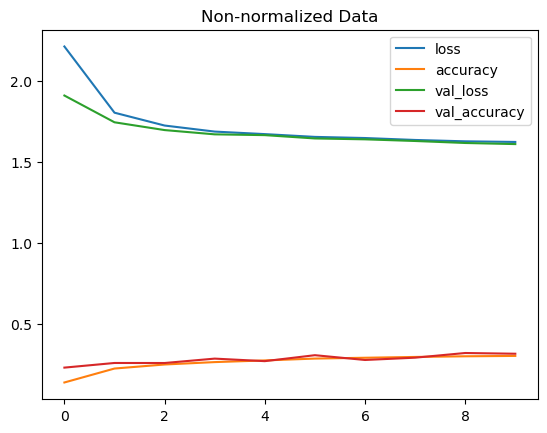

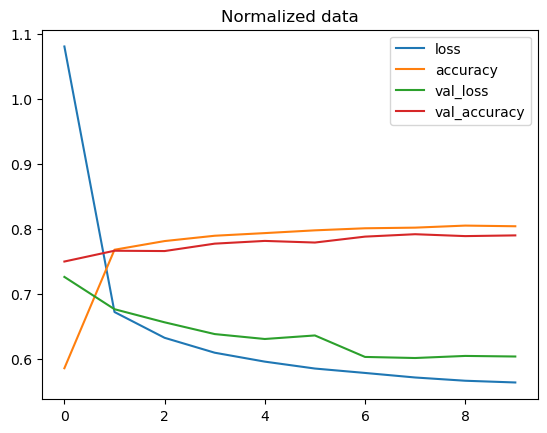

In [20]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

Wow. From these two plots, we can see how much quicker our model with the normalized data (model_12) improved than the model with the non-normalized data (model_11).

How about we find the ideal learning rate and see what happens?

We'll use the same architecture we've been using.

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0768 - accuracy: 0.5964 - val_loss: 0.7529 - val_accuracy: 0.7202 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6723 - accuracy: 0.7654 - val_loss: 0.6623 - val_accuracy: 0.7714 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.6007 - accuracy: 0.7938 - val_loss: 0.6141 - val_accuracy: 0.7885 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5677 - accuracy: 0.8044 - val_loss: 0.6174 - val_accuracy: 0.7883 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5505 - accuracy: 0.8103 - val_loss: 0.5971 - val_accuracy: 0.7858 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5393 - accuracy: 0.8129 - val_loss: 0.6114 - val_accuracy: 0.7866 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 

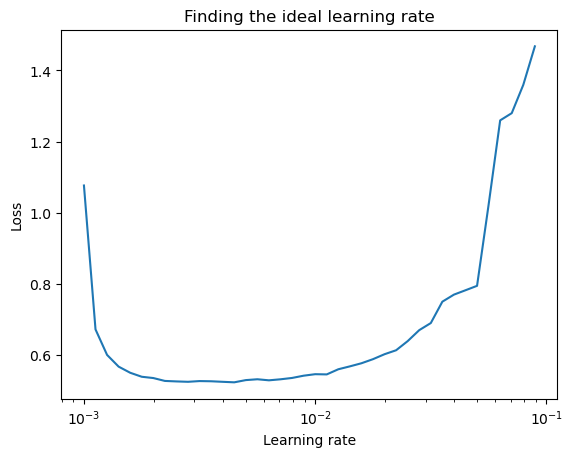

In [22]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In this case, it looks like somewhere close to the default learning rate of the Adam optimizer (0.001) is the ideal learning rate.

Let's refit a model using the ideal learning rate.

In [23]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2574 - accuracy: 0.5695 - val_loss: 0.8149 - val_accuracy: 0.7411
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6780 - accuracy: 0.7595 - val_loss: 0.6440 - val_accuracy: 0.7673
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5923 - accuracy: 0.7839 - val_loss: 0.6160 - val_accuracy: 0.7806
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5676 - accuracy: 0.7946 - val_loss: 0.5858 - val_accuracy: 0.7953
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5522 - accuracy: 0.8026 - val_loss: 0.5816 - val_accuracy: 0.7912
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5401 - accuracy: 0.8116 - val_loss: 0.5688 - val_accuracy: 0.8011
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5288 - accuracy: 0.8201 - val_loss: 0.5725 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:

* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [24]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)

    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  
  # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
    # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [31]:
# Make predictions with the most recent model
y_probs = model_14.predict(test_data) 

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[4.51565313e-10, 2.40894771e-08, 1.57545533e-18, 4.76360184e-12,
        3.78039546e-14, 2.22102582e-01, 5.53673914e-13, 4.48909253e-02,
        1.80116294e-05, 7.32988536e-01],
       [4.91182227e-03, 3.77467950e-03, 6.09338105e-01, 1.05707841e-02,
        2.39915118e-01, 3.84064182e-03, 1.23834044e-01, 5.91994787e-04,
        2.64558312e-03, 5.77247585e-04],
       [7.74852058e-04, 9.95931804e-01, 7.22758996e-04, 2.29974091e-03,
        3.79295343e-05, 2.35364655e-06, 8.76612175e-05, 1.16458006e-11,
        1.99040778e-06, 1.40958116e-04],
       [3.70869267e-04, 9.92351472e-01, 1.76829667e-06, 7.01500522e-03,
        5.38439508e-06, 3.42523983e-08, 4.83622125e-06, 2.31421774e-20,
        1.37500399e-06, 2.49338656e-04],
       [1.24809653e-01, 3.90823232e-04, 2.68682182e-01, 1.27029745e-02,
        1.25748785e-02, 8.85044690e-03, 5.64080477e-01, 2.50966725e-04,
        7.65331974e-03, 4.29477495e-06]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

To find the highest value we can use the argmax() method.

In [28]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [29]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]
     

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [32]:
# Check out the non-prettified confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[762,   5,  16,  80,   1,   1, 125,   0,  10,   0],
       [  0, 948,  15,  31,   3,   0,   3,   0,   0,   0],
       [ 14,   7, 731,   9, 170,   0,  69,   0,   0,   0],
       [ 27,  25,  18, 844,  46,   1,  37,   0,   2,   0],
       [  0,   0, 115,  33, 793,   0,  52,   0,   7,   0],
       [  0,   0,   0,   1,   0, 899,   1,  52,  15,  32],
       [161,   2, 168,  62, 145,   1, 453,   0,   8,   0],
       [  0,   0,   0,   0,   0,  38,   0, 931,   0,  31],
       [  0,   0,   4,   3,  18,   9,  49,   4, 912,   1],
       [  0,   0,   0,   1,   0,  19,   0,  48,   1, 931]], dtype=int64)

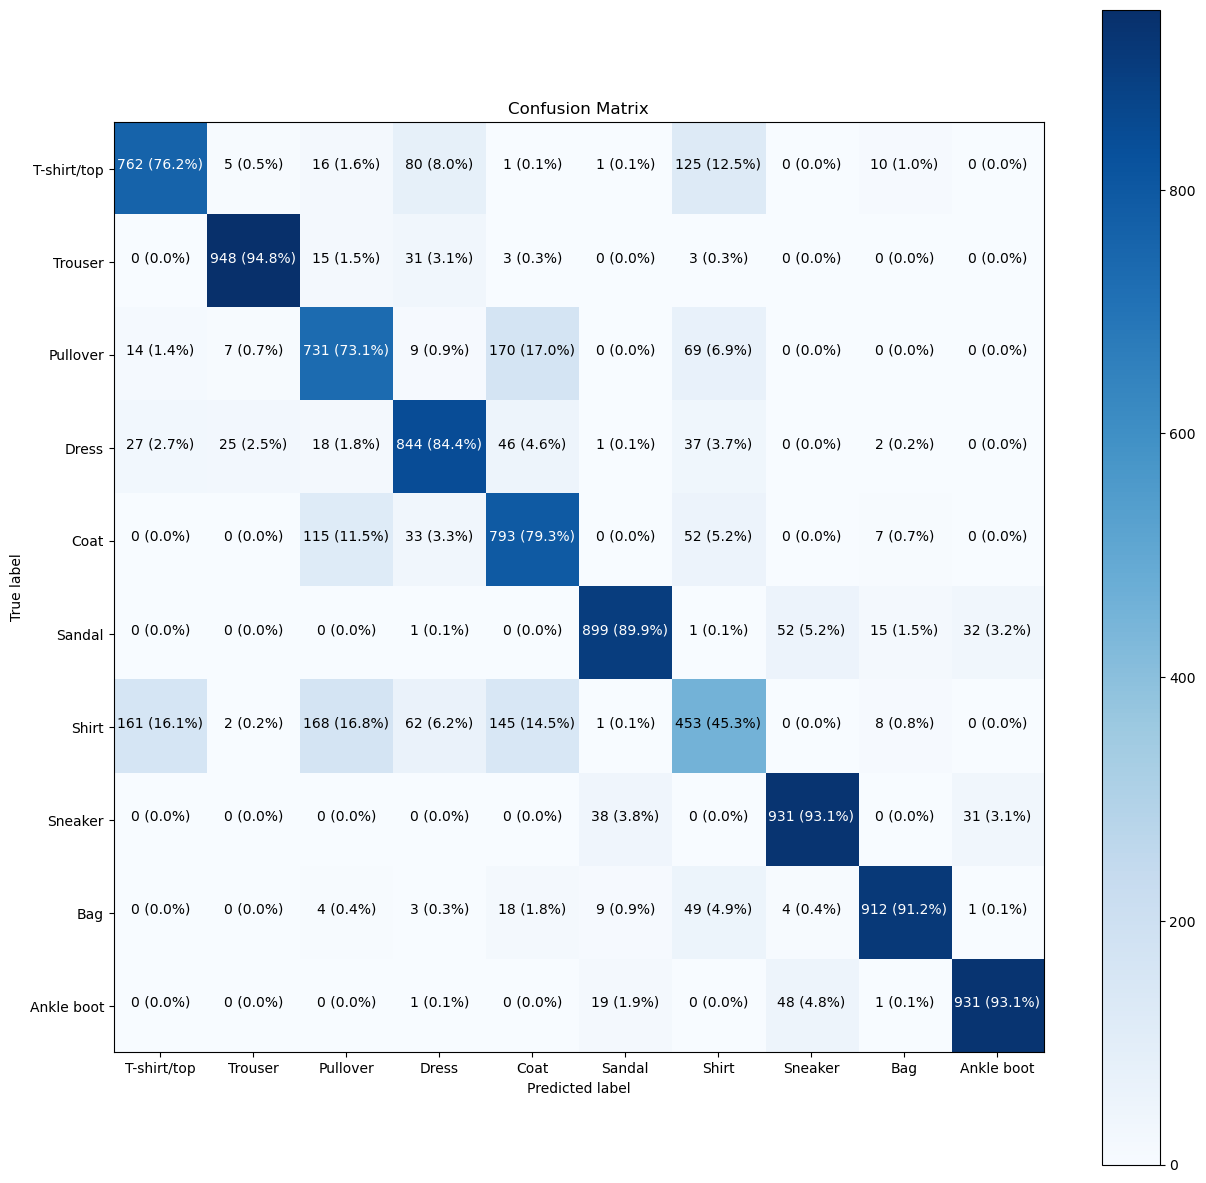

In [33]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)